In [161]:
import random
import matplotlib.pyplot as plt

In [162]:
#----  PROBLEM DEFINITION  ----#
# items that can be put in the knapsack
items = [[2, 10], [3, 7], [4, 15], [5, 10], [7, 3]]

# parameters for binary genetic algorithm
number_of_items = len(items)
knapsack_capacity = 10
population_size = 50
mutation_rate = 0.15
crossover_rate = 0.7
max_generations = 300
convergence_threshold = 0.001

In [163]:
# Function to generate a random population based on a given population size
def generate_population(size:int) -> list[list]:
    population = []
    genes = [0, 1]
    for _ in range(size):
        chromosome = [random.choice(genes) for _ in range(number_of_items)]
        population.append(chromosome)
    return population

In [164]:
# Function to calculate the fitness of a chromosome
def calculate_fitness(chromosome:list) -> int:
    total_weight = 0
    total_value = 0
    for i in range(len(chromosome)):
        if chromosome[i] == 1:
            total_weight += items[i][0]
            total_value += items[i][1]
    if total_weight > knapsack_capacity:
        return 0
    else:
        return total_value

In [165]:
# Function to perform uniform cross-over between two chromosomes and produce the offspring
def uniform_crossover(parent1:list, parent2:list) -> tuple:
    offspring1 = []
    offspring2 = []
    for i in range(len(parent1)):
        if random.random() <= crossover_rate:
            offspring1.append(parent1[i])
            offspring2.append(parent2[i])
        else:
            offspring1.append(parent2[i])
            offspring2.append(parent1[i])
    return offspring1, offspring2

In [166]:
# Function to perform mutation on a chromosome by flipping
def mutate(chromosome:list) -> None:
    for i in range(len(chromosome)):
        if random.uniform(0, 1) <= mutation_rate:
            chromosome[i] = 1 - chromosome[i]

In [167]:
# Function to select a parent based on roulette-wheel selection algorithm
def roulette_wheel_selection(population:list[list], fitness_values:list) -> list:
    cumulative_probability = 0
    randNum = random.uniform(0.0, 1.0)
    sel = 0
    
    for indx, probability in enumerate(fitness_values):
        cumulative_probability += probability
        if cumulative_probability >= randNum:
            sel = indx
            break
    
    return population[sel]

Best chromosome = [1, 0, 0, 1, 0]
Total weight = 7
Total value = 20


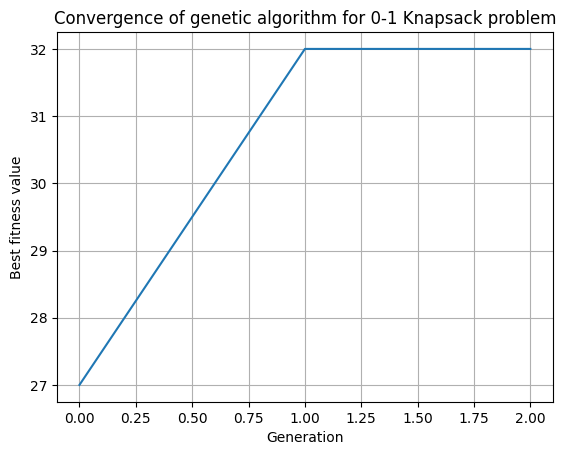

In [168]:
population = generate_population(population_size)
best_fitness_values = []
best_chromosome_index = []

for _ in range(max_generations):
    fitness_values = []
    for chromosome in population:
        fitness_values.append(calculate_fitness(chromosome))
    
    max_fitness = max(fitness_values)
    best_fitness_values.append(max_fitness)
    max_indx = best_fitness_values.index(max_fitness)
    best_chromosome_index.append(max_indx)
    
    if len(best_fitness_values) > 1:
        rate_of_change = abs((best_fitness_values[-1] - best_fitness_values[-2]) / sum(fitness_values))
        if rate_of_change < convergence_threshold:
            break
    
    unfit_chromosomes_count = fitness_values.count(0)
    
    while unfit_chromosomes_count > 0:
        parent1 = roulette_wheel_selection(population, fitness_values)
        parent2 = roulette_wheel_selection(population, fitness_values)
    
        offspring1, offspring2 = uniform_crossover(parent1, parent2)
        mutate(offspring1)
        mutate(offspring2)
    
        unfit_indx = fitness_values.index(0)
        population[unfit_indx] = offspring1
        fitness_values[unfit_indx] = -1
        unfit_chromosomes_count -= 1
    
        if unfit_chromosomes_count > 0:
            unfit_indx = fitness_values.index(0)
            population[unfit_indx] = offspring2
            fitness_values[unfit_indx] = -1
            unfit_chromosomes_count -= 1

max_fitness = max(best_fitness_values)
max_indx = best_fitness_values.index(max_fitness)
result = population[best_chromosome_index[max_indx]]

total_weight = 0
total_value = 0
for indx, val in enumerate(result):
    if val == 1:
        total_weight += items[indx][0]
        total_value += items[indx][1]

print("Best chromosome =",result)
print(f"Total weight = {total_weight}\nTotal value = {total_value}")

plt.plot(best_fitness_values)
plt.xlabel('Generation')
plt.ylabel('Best fitness value')
plt.title('Convergence of genetic algorithm for 0-1 Knapsack problem')
plt.grid(True)
plt.show()